In [6]:
import numpy as np                                 ##Librerías Importadas 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from PIL import Image
import warnings
from PIL import Image
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import models, layers
import os
import random


In [37]:
train_images = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_images = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

train_labels = tf.keras.utils.image_dataset_from_directory(train_images)
test_labels= tf.keras.utils.image_dataset_from_directory(test_images)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [38]:
vegetables = train_labels.class_names
print(vegetables)
print(len(vegetables)) ## Clases y numemro de Clases  


['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
15


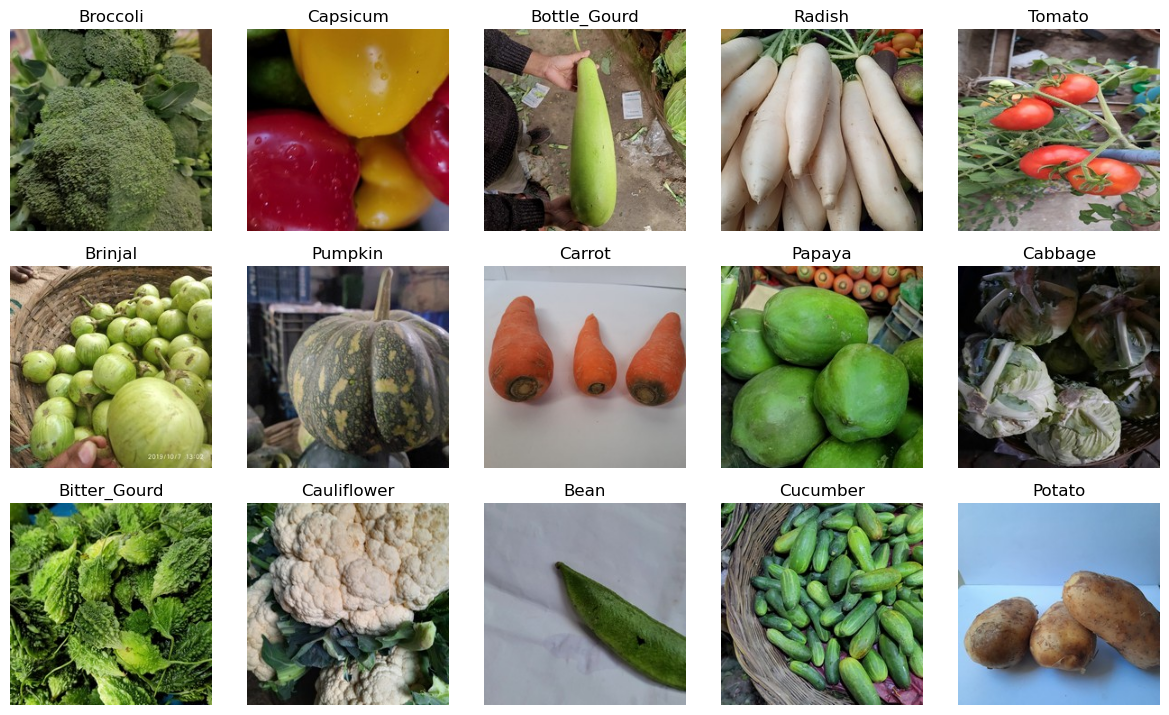

In [4]:
import os 

train_dir = "../input/vegetable-image-dataset/Vegetable Images/train"

image_categories = os.listdir(train_dir)

plt.figure(figsize=(12, 12))

for i, category in enumerate(image_categories):
    image_files = os.listdir(os.path.join(train_dir, category))
    image_file = image_files[0]
    image_path = os.path.join(train_dir, category, image_file)
    image = Image.open(image_path)
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()

In [39]:
model = Sequential()  ## definir el modelo secuencial de la red 

In [42]:

model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3)))          # Modelo convulcional  

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())







In [43]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  #clasificacion
model.add(layers.Dense(len(vegetables)))

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#compilacion 

In [45]:
model.summary() #datos


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)       

In [46]:
history = model.fit(train_labels, validation_data= test_labels, epochs=10)

Epoch 1/10
469/469 [==============================] - 394s 836ms/step - loss: 1.1325 - accuracy: 0.6370 - val_loss: 0.5993 - val_accuracy: 0.8173
Epoch 2/10
469/469 [==============================] - 397s 845ms/step - loss: 0.4030 - accuracy: 0.8747 - val_loss: 0.4117 - val_accuracy: 0.8790
Epoch 3/10
469/469 [==============================] - 398s 848ms/step - loss: 0.2002 - accuracy: 0.9375 - val_loss: 0.3673 - val_accuracy: 0.8983
Epoch 4/10
469/469 [==============================] - 392s 836ms/step - loss: 0.1232 - accuracy: 0.9617 - val_loss: 0.3641 - val_accuracy: 0.9060
Epoch 5/10
469/469 [==============================] - 389s 829ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.3737 - val_accuracy: 0.9140
Epoch 6/10
469/469 [==============================] - 389s 830ms/step - loss: 0.0573 - accuracy: 0.9827 - val_loss: 0.4895 - val_accuracy: 0.8880
Epoch 7/10
469/469 [==============================] - 397s 845ms/step - loss: 0.0594 - accuracy: 0.9817 - val_loss: 0.3767 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

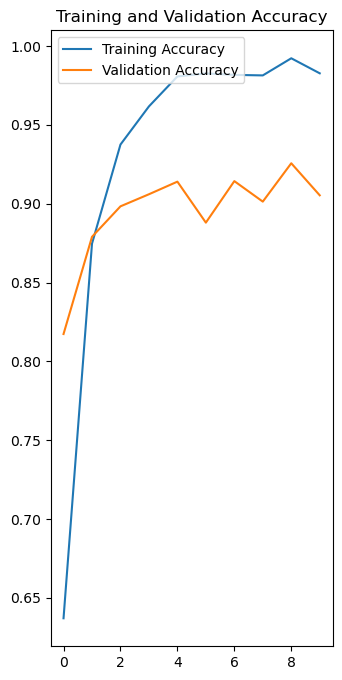

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')


In [49]:
image_paths = []

In [50]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)

Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Carrot/1136.jpg


1/1 [==============================] - 0s 29ms/step
This image most likely belongs to Carrot with a 99.99 percent confidence.


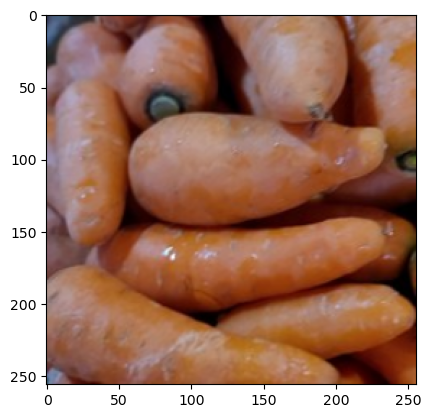

In [52]:
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Potato/1013.jpg
1/1 [==============================] - 0s 26ms/step
This image most likely belongs to Potato with a 99.96 percent confidence.


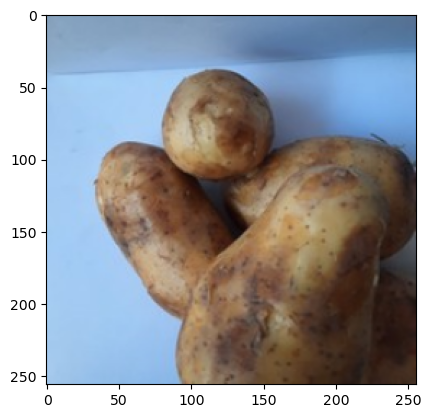

In [53]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()



Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Potato/1157.jpg
1/1 [==============================] - 0s 30ms/step
This image most likely belongs to Potato with a 100.00 percent confidence.


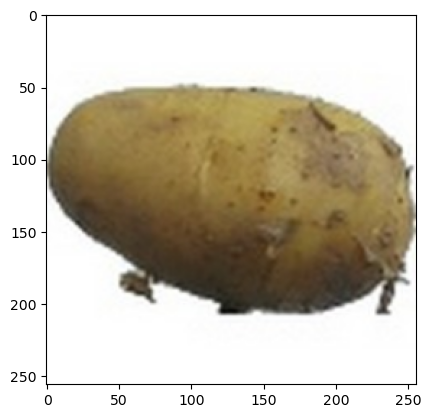

In [54]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Cauliflower/1074.jpg
1/1 [==============================] - 0s 26ms/step
This image most likely belongs to Cauliflower with a 99.96 percent confidence.


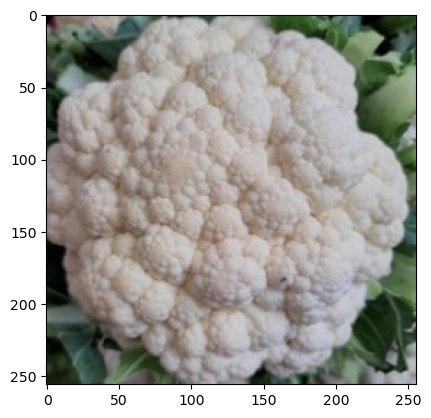

In [55]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Bean/0311.jpg
1/1 [==============================] - 0s 27ms/step
This image most likely belongs to Capsicum with a 84.65 percent confidence.


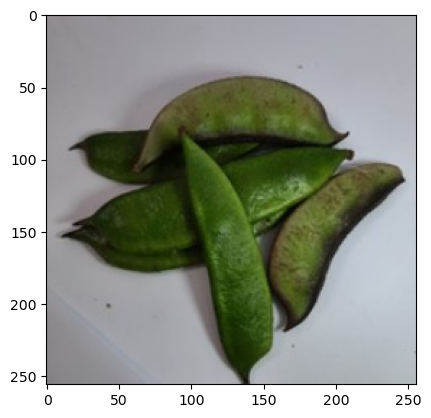

In [57]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()
